#### [1] EDA Titanic, Other Distributions and CLT Demo

<img src='Data/Input/UP Data Science Society Logo 2.png' width=700>

# [1] Python for Statistics

**Prepared by:**

- Joshua Castillo
- Lanz Lagman

**Topics to cover:** 

- Exploratory Data Analysis: The Titanic Dataset Revisited
    - Gaussian Distribution and Approximation 
    - Central Limit Theorem (CLT)
- Other Distributions and CLT Demonstration
    - Binomial Distribution
    - Poisson Distribution
    - Exponential Distribution
    - CLT Demonstration

**References:**
- [(Ivezic, Connolly, Vanderplas, Gray) Statistics, Data Mining, and Machine Learning in Astronomy](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy)
- [(Vanderplas) Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [(DataCamp) Introduction to Statistics](https://www.datacamp.com/courses/introduction-to-statistics)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- It is possible to set up default plotting parameters. 

# I. Exploratory Data Analysis: The Titanic Dataset Revisited

In [ ]:
import seaborn as sns

The columns stand for the following:

- `'survived'` State if the passenger survived ; `0 = No`, `1 = Yes` 
- `'pclass'` Ticket class  ; `	1 = 1st`,` 2 = 2nd`, `3 = 3rd` ; 1st = Upper, 2nd = Middle, 3rd = Lower
- `'sex'` Sex ; `male` , `female`
- `'age'` Age 
- `'sibsp'` Number of siblings / spouses aboard the Titanic
- `'parch'` Number of parents / children aboard the Titanic
- `'fare'` Ticket/Fare price
- `'embarked'` Port of Embarkation `C = Cherbourg`,` Q = Queenstown`,`S = Southampton`
- `'class'` Ticket class  ; `	First = 1st`,` Second = 2nd`, `Third = 3rd` ; 1st = Upper    2nd = Middle    3rd = Lower
- `'who'` Sex ; `man` , `woman`
- `'adult_male'` State if the passenger was an adult male; `False`, `True` 
- `'deck'` Deck class when the disaster happened
- `'embark_town'` Port of Embarkation `Cherbourg`,`Queenstown`,`Southampton`
- `'alive'` State if the passenger survived ; `no`, `yes` 
- `'alone'` State if the passenger was traveling alone ; `False`, `True` 

In [ ]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- Recall how we split `titanic_df` based on class.

In [ ]:
Class1st_df = titanic_df[titanic_df['class']=='First'].reset_index(drop=True)
Class2nd_df = titanic_df[titanic_df['class']=='Second'].reset_index(drop=True)
Class3rd_df = titanic_df[titanic_df['class']=='Third'].reset_index(drop=True)

Class_df_list = [Class1st_df, Class2nd_df, Class3rd_df]
Class_title_list = ['1st Class', '2nd Class', '3rd Class']

- Recall the preview of the measures of spread of the age distribution for each class.

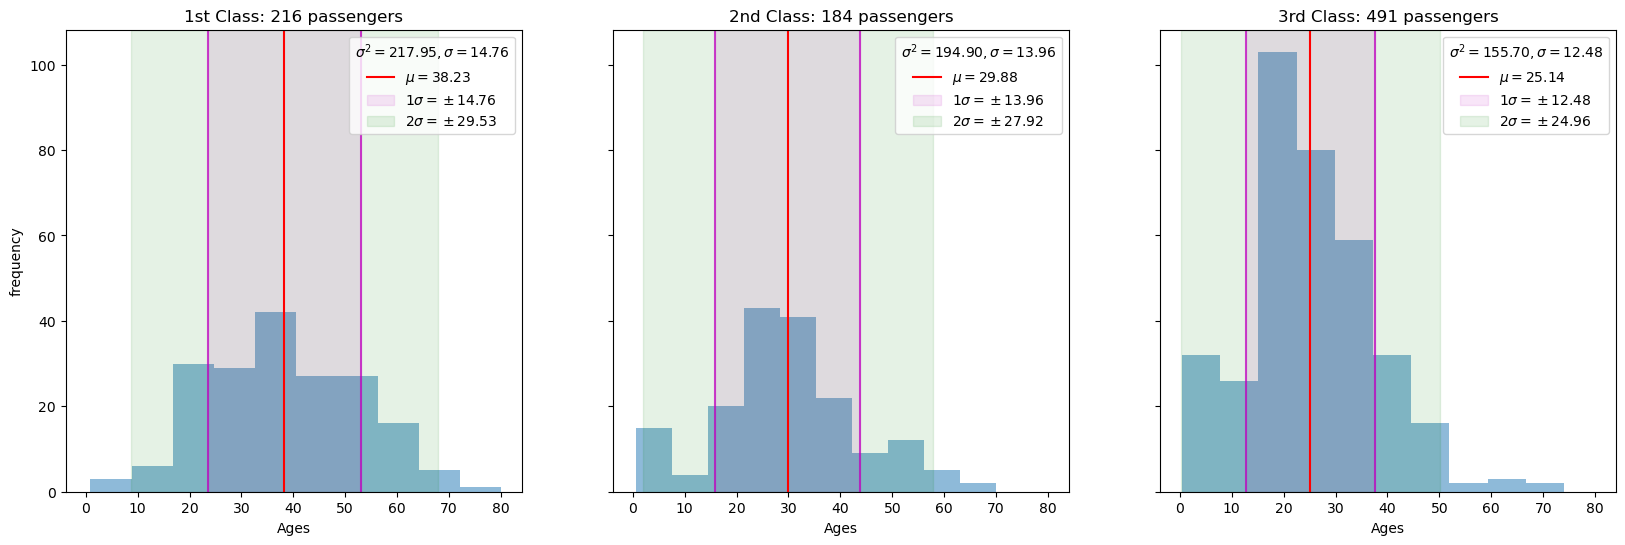

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,6), sharex=True, sharey=True)

for df, title, axs in zip(Class_df_list, Class_title_list, ax.reshape(-1)):

    axs.hist(df['age'], alpha=0.5);
    axs.set(title=f"{title}: {len(df)} passengers", 
            xlabel='Ages')

    axs.axvline(df['age'].mean(), label=f"$\mu = {df['age'].mean():.2f}$", color='r')
    axs.axvline(df['age'].mean() + df['age'].std(ddof=0), color='m', alpha=0.75)
    axs.axvline(df['age'].mean() - df['age'].std(ddof=0), color='m', alpha=0.75)

    axs.axvspan(df['age'].mean() - df['age'].std(ddof=0), 
                 df['age'].mean() + df['age'].std(ddof=0), 
                 label= f"$1\sigma = \pm{df['age'].std(ddof=0):.2f}$",
                 color='m', alpha=0.1)

    axs.axvspan(df['age'].mean() - 2*df['age'].std(ddof=0), 
                 df['age'].mean() + 2*df['age'].std(ddof=0), 
                 label= f"$2\sigma = \pm{2*df['age'].std(ddof=0):.2f}$",
                 color='g', alpha=0.1)
    
    axs.legend(title=f"$\sigma^2 = {df['age'].var(ddof=0):.2f}, \sigma={df['age'].std(ddof=0):.2f}$")
ax[0].set(ylabel='frequency');

## A. The Gaussian Distribution and Approximation

$$ p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left( \frac{-(x-\mu)^2}{2\sigma^2} \right)$$

Wherein

- $p(x|\mu,\sigma)$: PDF of Gaussian distribution as a function of $x$, and constants $\mu,\sigma$
- $\mu$: mean
- $\sigma$: standard deviation

**Observed from:**

- IQ test scores
- Height and weight of a population
- Gaussian wavepacket in quantum mechanics

- To start, we must first demonstrate how to construct and visualize a Gaussian distribution.
- Gaussian distributions are defined by their mean $\mu$ and their standard deviation $\sigma$.
- We can construct samples using `numpy` and the probability distribution function using `scipy` via the `stats` module.
    - However, it is also possible to construct samples using `scipy`.

In [ ]:
from scipy import stats

- Prepare a list of sigma values and linestyles for each sigma.
- Prepare the array of x-values.

In [ ]:
sigma_list = [0.5, 1.0, 2.0]
ls_list = ['-', '--', ':']
x = np.linspace(-5, 5, 1000)

- Plot `numpy` samples as histograms and plot `scipy` PDFs as line graphs.
- For all plots, add legend values indicating each Gaussian distribution, with labels for their respective $\mu$ and $\sigma$ values.
- As we can see, Gaussian distributions are symmetrical.

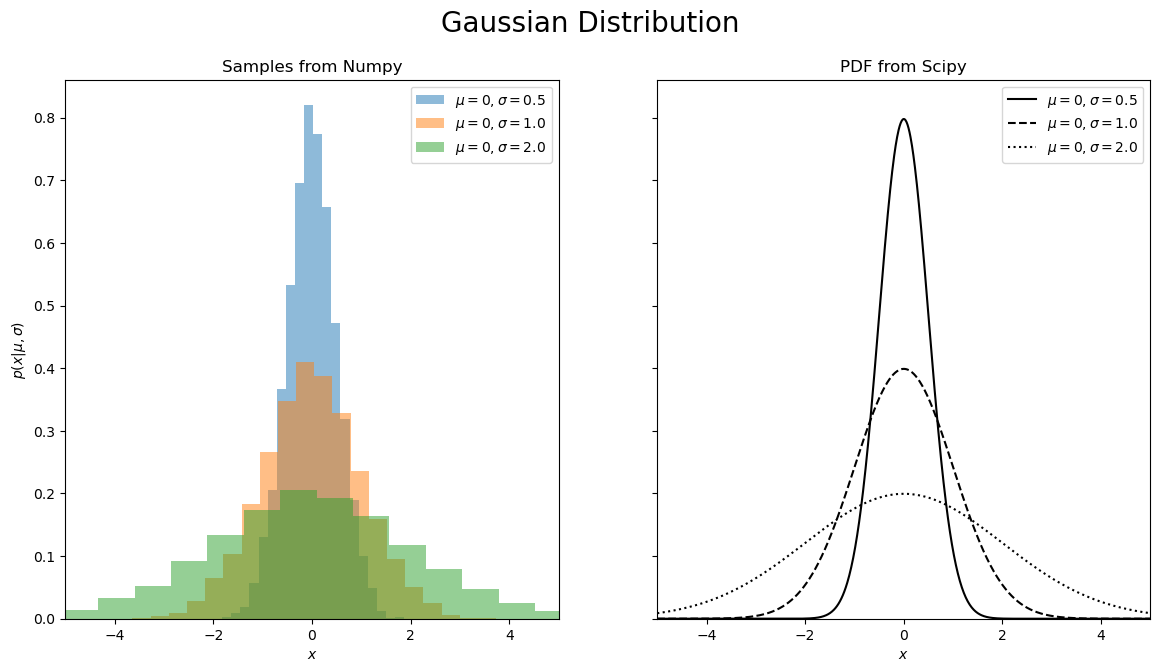

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,7), sharex=True, sharey=True)
fig.suptitle("Gaussian Distribution", fontsize=20)


for sigma, ls in zip(sigma_list, ls_list):
    np.random.seed(69)
    
    mu=0
    gaussian_sample = np.random.normal(mu, sigma, 10000)
    count, bins, ignored = ax[0].hist(gaussian_sample, bins=20, alpha=0.5, 
                                      density=True, 
                                      label=f'$\mu={mu}, \sigma={sigma}$')
    
    ax[0].set(title="Samples from Numpy", 
              xlabel=r"$x$", ylabel=r"$p(x|\mu,\sigma)$", 
              xlim=(-5,5), ylim=(0))
    ax[0].legend()
    
    
    dist = stats.norm(0, sigma)
    ax[1].plot(x, dist.pdf(x), ls=ls, c='black', 
               label=f'$\mu=0, \sigma={sigma}$')
    
    ax[1].set(title="PDF from Scipy", 
           xlabel=r"$x$", 
           xlim=(-5,5), ylim=(0))
    ax[1].legend()

### Application to the Titanic Dataset


- Of all the age distributions, the ages of the first-class passengers is the most symmetrical and therefore, Gaussian.
- We can also assume that they're composed of adult businessmen accompanied by their spouse and/or children and siblings.

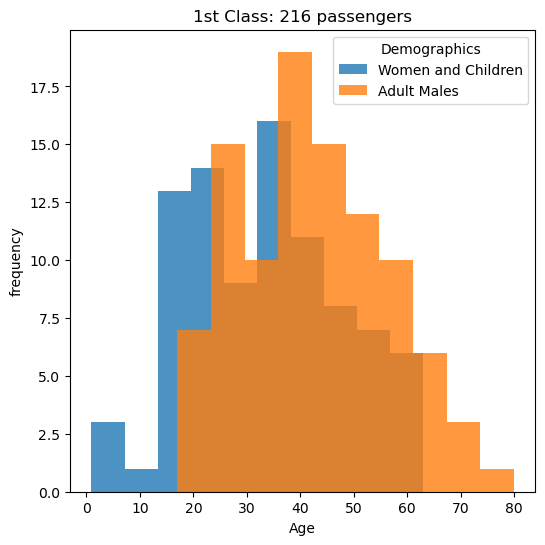

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

Class1st_df[Class1st_df['adult_male'] == 0]['age'].hist(alpha=0.8, 
                                                        label='Women and Children', 
                                                        grid=False, ax=ax)
Class1st_df[Class1st_df['adult_male'] == 1]['age'].hist(alpha=0.8, 
                                                        label='Adult Males', 
                                                        grid=False, ax=ax)
ax.set(title=f'1st Class: {len(Class1st_df)} passengers', xlabel='Age', ylabel='frequency')
ax.legend(title='Demographics')

- Before we can approximate the first-class age distribution as a Gaussian approximation, let's determine the minimum and maximum ages and use them to define the range of our continuous x-values.

In [ ]:
Class1st_age_min,  Class1st_age_max = Class1st_df['age'].min(), Class1st_df['age'].max()
x = np.arange(Class1st_age_min, Class1st_age_max, 0.1)

- Next, we determine the mean $\mu$ and standard deviation $\sigma$ to construct a Gaussian distribution `Class1st_dist`.

In [ ]:
Class1st_mu, Class1st_std = Class1st_df['age'].mean(), Class1st_df['age'].std()
Class1st_dist = stats.norm(Class1st_mu, Class1st_std) 

- We can plot the PDF of the histogram and the approximate Gaussian distribution together.
- Note that we set `density=True` for the age histogram so that the area under the curve of the actual distribution is equal to 1.

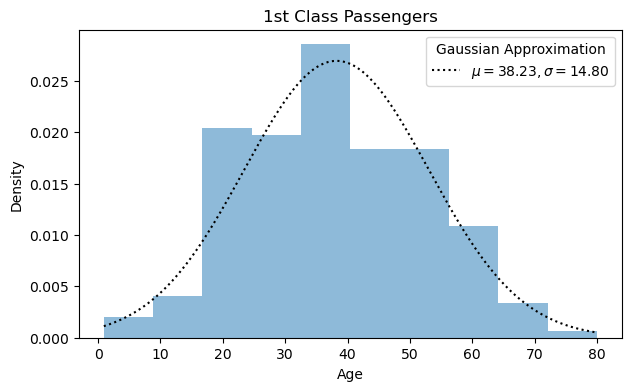

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))


ax.hist(Class1st_df['age'], density=True, alpha=0.5)

ax.plot(x, Class1st_dist.pdf(x), ls=ls, c='black', 
        label=f'$\mu={Class1st_mu:.2f}, \sigma={Class1st_std:.2f}$')

ax.set(title='1st Class Passengers', xlabel='Age', ylabel='Density')
ax.legend(title='Gaussian Approximation')

- To maximize the use of Gaussian approximation, we can use it to determine which part of the distribution falls on a certain threshold.
- In this example, we'll construct a cumulative distribution function (CDF) to determine the percentage of first-class passengers that are minors.
- This means that we're interested at the section of the Gaussian PDF wherein the x-values are less than 18.
- To do this, we just need to access the `cdf()` method of `Class1st_dist` with 18 as argument, creating `minors_norm_cdf`.
- Then, for plotting the CDF, we create an array of x-values called `minors_x`, starting from the minimum value of the age distribution up to 18.

In [ ]:
minors_norm_cdf = Class1st_dist.cdf(18)
minors_x = np.linspace(Class1st_age_min, 18, 100)

print(f"Percentage of 1st-class passengers that are below 18: {minors_norm_cdf:.2%}")

Percentage of 1st-class passengers that are below 18: 8.58%


- Together with the original age histogram and the approximate Gaussian PDF, we can plot the highlighted CDF using `fill_between`.
- The arguments for `fill_between` will be `minors_x` and the `pdf()` method of `Class1st_dist` with values of `minors_x` as argument.

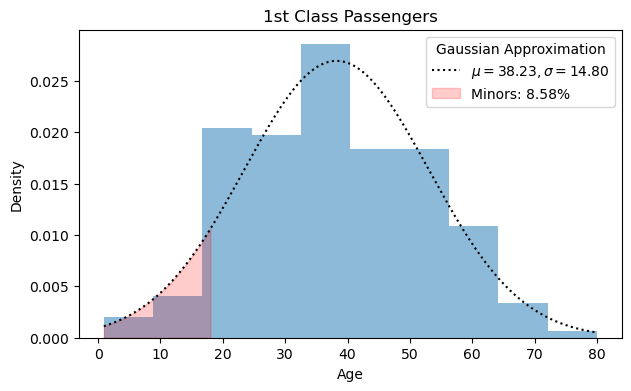

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

ax.hist(Class1st_df['age'], density=True, alpha=0.5)

ax.plot(x, Class1st_dist.pdf(x), ls=ls, c='black', 
        label=f'$\mu={Class1st_mu:.2f}, \sigma={Class1st_std:.2f}$')

ax.fill_between(minors_x, Class1st_dist.pdf(minors_x), color='r', alpha=0.2, 
                label=f'Minors: {minors_norm_cdf:.2%}')

ax.set(title='1st Class Passengers', xlabel='Age', ylabel='Density')
ax.legend(title='Gaussian Approximation')

- For seniors whose age is above 60, we have to subtract the CDF `cdf(60)` of `Class1st_dist` from 1 in order to obtain the proper section of the Gaussian PDF, creating `seniors_norm_cdf`.
- Then, we just create the appropriate x-values for `seniors_norm_cdf`, which is `seniors_x`.

In [ ]:
seniors_norm_cdf = 1 - Class1st_dist.cdf(60)
seniors_x = np.linspace(60, Class1st_age_max, 100)

print(f"Percentage of 1st-class passengers that are above 60: {seniors_norm_cdf:.2%}")

Percentage of 1st-class passengers that are above 60: 7.07%


- We now have a plot for a clear overview of the age distribution, complete with approximate Gaussian PDF sections for minors and seniors, which turn out to be quite similar, just off by ~$\pm1.5%$.

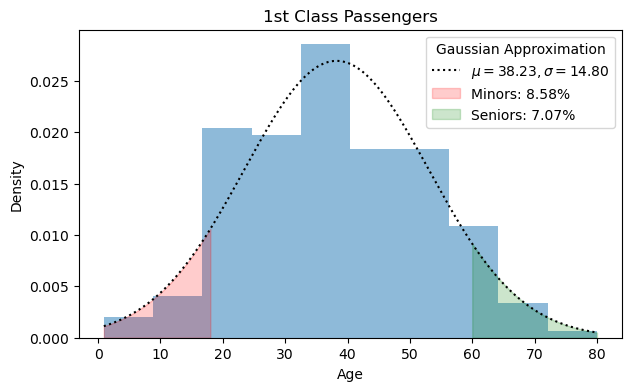

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

ax.hist(Class1st_df['age'], density=True, alpha=0.5)

ax.plot(x, Class1st_dist.pdf(x), ls=ls, c='black', 
        label=f'$\mu={Class1st_mu:.2f}, \sigma={Class1st_std:.2f}$')

ax.fill_between(minors_x, Class1st_dist.pdf(minors_x), color='r', alpha=0.2, 
                label=f'Minors: {minors_norm_cdf:.2%}')

ax.fill_between(seniors_x, Class1st_dist.pdf(seniors_x), color='g', alpha=0.2, 
                label=f'Seniors: {seniors_norm_cdf:.2%}')

ax.set(title='1st Class Passengers', xlabel='Age', ylabel='Density')
ax.legend(title='Gaussian Approximation')

- Lastly, we can even fit the original age distribution to a Gaussian distribution via the `fit()` method of scipy's `norm`.
- We can then extract the mean $\mu$ and standard deviation $\sigma$ in order to compare against the actual distribution.

In [ ]:
norm_fit_mean, norm_fit_std = stats.norm.fit(Class1st_df['age'].dropna().values)

print(f"Gaussian Fit results: mean = {norm_fit_mean:.2f}, std = {norm_fit_std:.2f}")
print(f"Actual values: mean = {Class1st_mu:.2f}, std = {Class1st_std:.2f}")

Gaussian Fit results: mean = 38.23, std = 14.76
Actual values: mean = 38.23, std = 14.80


## B. Central Limit Theorem

> The distribution of an $n$-number of mean samples approximates a Gaussian distribution the bigger the value of $n$ is. This is true regardless of the shape of the distribution.

- We can get n-samples per column or dataframe via the `sample()` method.
- The important arguments are:
    - `n`: number of samples to be obtained
    - `replace`: Allow or disallow sampling of the same row more than once.
    - `random_state`: seed for random number generator. 

- Let's try to get 10 random samples from the `age` column of `Class1st_df`.

In [ ]:
Class1st_df['age'].sample(10, random_state=420)

186    36.0
42     38.0
91     36.0
150    61.0
110    35.0
69     18.0
20     23.0
145     NaN
19     71.0
0      38.0
Name: age, dtype: float64

- To demonstrate CLT, we do the following:
    - Get 100 samples, get the mean of these samples, do this 100 times.
    - Get 100 samples, get the mean of these samples, do this 1000 times.
    - Get 100 samples, get the mean of these samples, do this 10000 times.
- The initially empty list will be filled with 100, 1000, 10000 mean of samples for each loop.
- A histogram is produced for each loop, showing that as more loops are made, the closer the histograms look like Gaussian distributions.
- Compared to the population distribution, the distribution of the mean of samples are much larger.

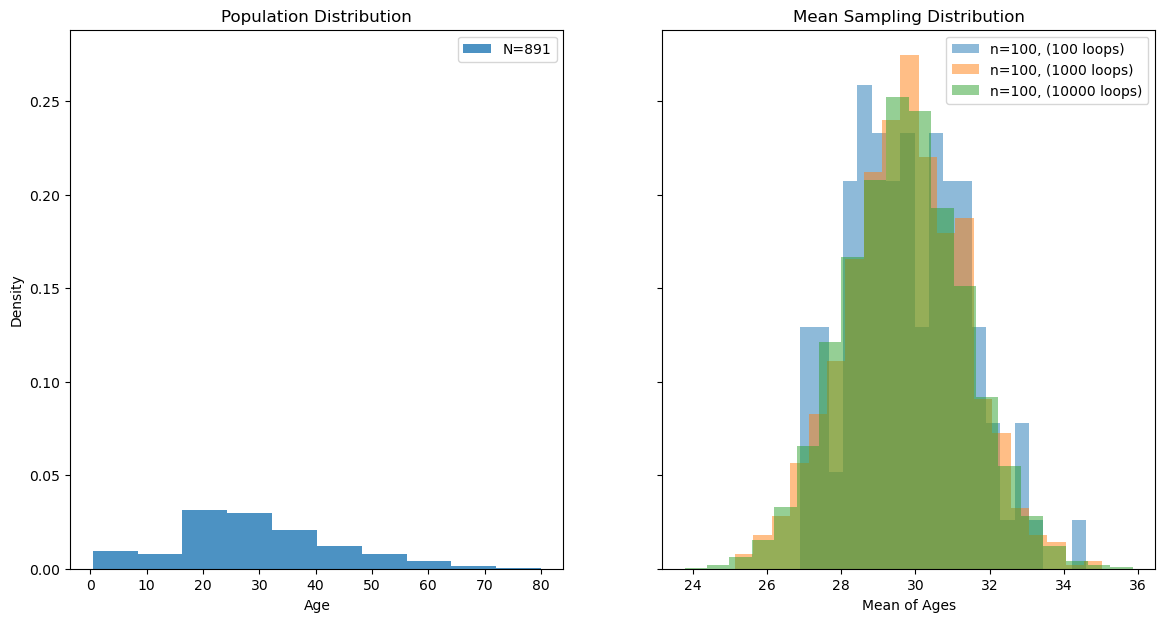

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,7), sharey=True)

ax[0].hist(titanic_df['age'], density=True, alpha=0.8, label=f"N={len(titanic_df['age'])}")
ax[0].set(title='Population Distribution', xlabel='Age', ylabel='Density')
ax[0].legend()
for n in [100,1000,10000]:
    
    np.random.seed(420)
    sample_means = []
    
    for i in range(n):
        samp = titanic_df['age'].sample(100, replace=True)
        sample_means.append(np.mean(samp))
        
    ax[1].hist(sample_means, label=f"n=100, ({n} loops)", bins=20, alpha=0.5, density=True);

ax[1].set(title='Mean Sampling Distribution', xlabel='Mean of Ages')
ax[1].legend()

### Another way of demonstrating CLT.

- The other way would focus on changing the number of samples instead of the number of loops previously.
    - Get 1 sample, get the mean of this sample, do this 10,000 times.
    - Get 2 sample, get the mean of these samples, do this 10,000 times.
    - Get 4 sample, get the mean of these samples, do this 10,000 times.
    - Get 8 sample, get the mean of these samples, do this 10,000 times.
- In this way, we can clearly see that just by changing the sample size only, the distribution of mean of samples become more Gaussian, and they're not that large compared to the population distribution unlike the previous demonstration.

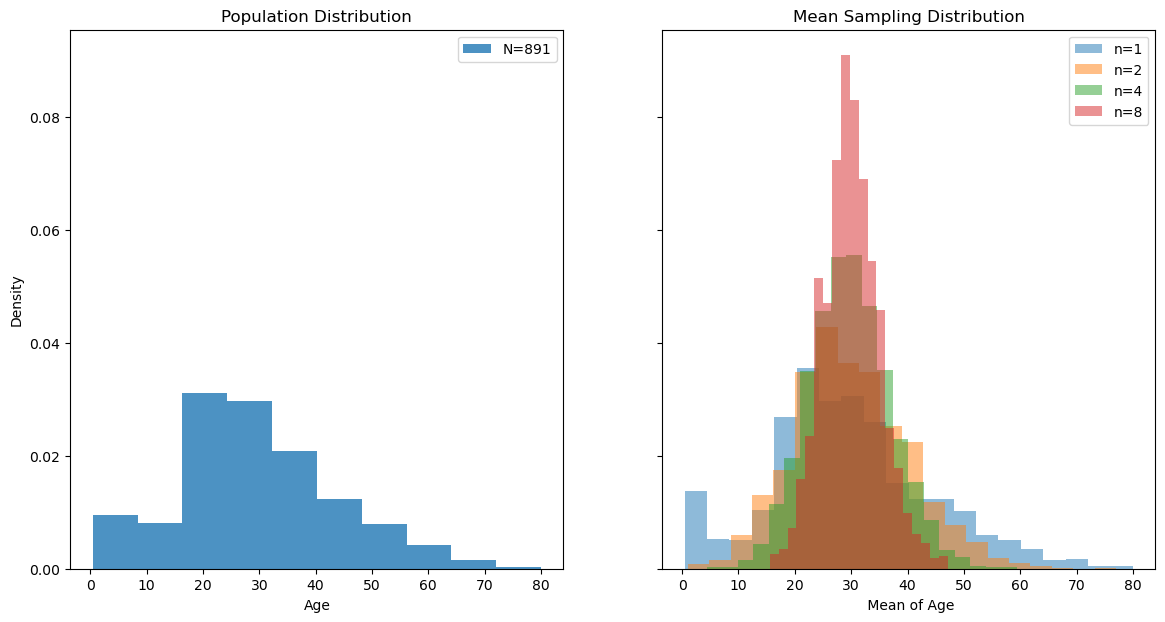

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,7), sharey=True)

ax[0].hist(titanic_df['age'], density=True, alpha=0.8, label=f"N={len(titanic_df['age'])}")
ax[0].set(title='Population Distribution', xlabel='Age', ylabel='Density')
ax[0].legend()

for n in [1,2,4,8]:
    
    np.random.seed(420)
    sample_means = []
    
    for i in range(10000):
        samp = np.random.choice(titanic_df['age'].values, n)
        sample_means.append(np.mean(samp))
        
    ax[1].hist(sample_means, label=f"n={n}", bins=20,
               #histtype='step', 
               alpha=0.5,
               density=True);

ax[1].set(title='Mean Sampling Distribution', xlabel=' Mean of Age')
ax[1].legend()

- In the last section, we'll demonstrate that the CLT holds true regardless of the given distribution.
- We'll show this by creating a function `CLT_Demonstrator` based on these plots that take in any 1D distribution array and a list of n-samples to consider.
- The number of samples $n$ to consider, and $n$ itself, is arbitrary. 
    - CLT could be observed already on some distributions by considering a set of integers less than 10.

# II. Other Distributions and CLT Demonstration

## A. Binomial Distribution

$$ p(k|b,N) = \frac{N!}{k!(N-k)!}b^k(1-b)^{N-k}$$

Wherein

- $p(k|b,N)$: Binomial probability distribution as a function of $k$, and constants $b,N$
- $k$: Number of successful trials
- $b$: Number of unsuccessful trials i.e. failure
- $N$: total number of trials

**Observed from:**

- Probability of getting exactly n correct items in a 10 item multiple choice test thru sheer guessing
- **Probability of picking out a member from DSSoc that has a jowa**

In [ ]:
n_list = [20,20,40]
b_list = [0.2,0.6,0.6]
binom_x = np.arange(0,36)

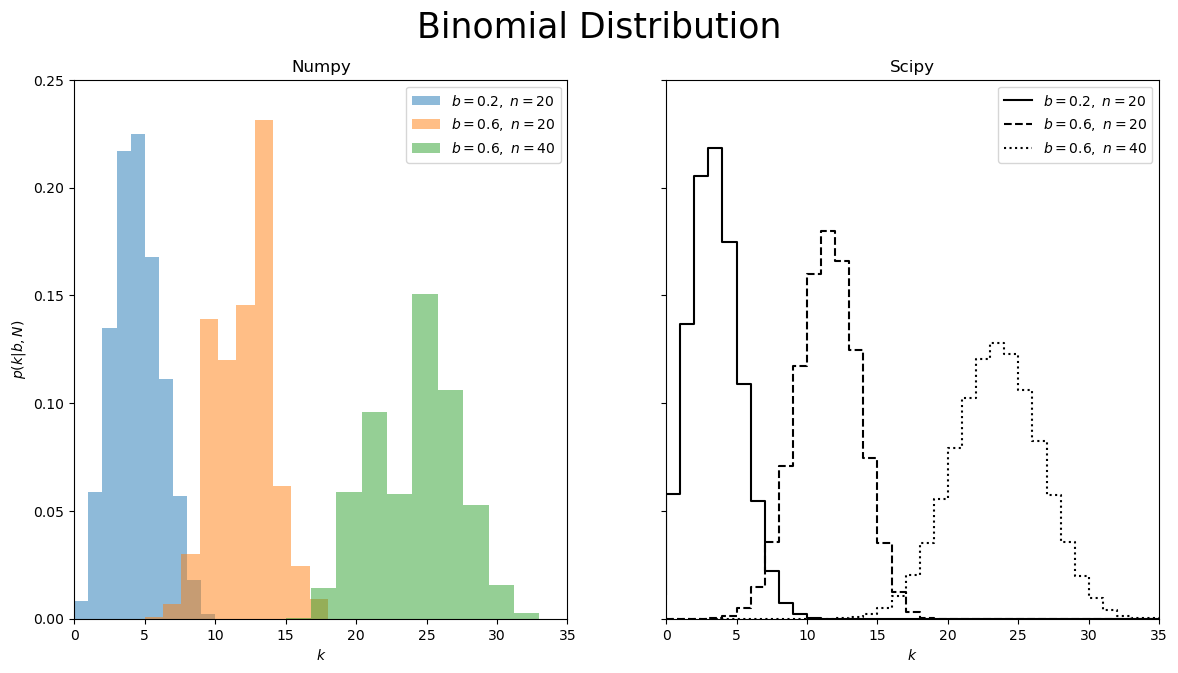

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,7), sharex=True, sharey=True)
fig.suptitle("Binomial Distribution", fontsize=25)

for n, b, ls in zip(n_list, b_list, ls_list):
    np.random.seed(69)
    sample = np.random.binomial(n,b,1000)
    count, bins, ignored = ax[0].hist(sample, bins=10, alpha=0.5, 
                                   density=True, label=f'$b={b},\ n={n}$')
    
    ax[0].set(title="Numpy", 
           xlabel=r"$k$", ylabel=r"$p(k|b, N)$",
           xlim=(0,35), ylim=(0,0.25))
    ax[0].legend()
    
    
    dist = stats.binom(n, b)
    ax[1].step(binom_x, dist.pmf(binom_x), ls=ls, c='black',
             label=f'$b={b},\ n={n}$')
    
    ax[1].set(title="Scipy", 
           xlabel=r"$k$", 
           xlim=(0,35), ylim=(0,0.25))
    ax[1].legend()

## B. Poisson Distribution


$$ p(k|\mu) = \frac{\mu^k \exp(-\mu)}{k!} $$

Wherein

- $p(k|\mu)$: Poisson probability distribution as a function of $k$, and constant $\mu$
- $k$: number of successful trials
- $\mu$: mean

**Observed from:**

- Probability of getting struck by lightning given an average lifespan of approx. 80 years
- Probability of hearing an ambulance pass by every hour if you leave near PGH

In [ ]:
mu_list = [1,5,15]
poisson_x = np.arange(0,31)

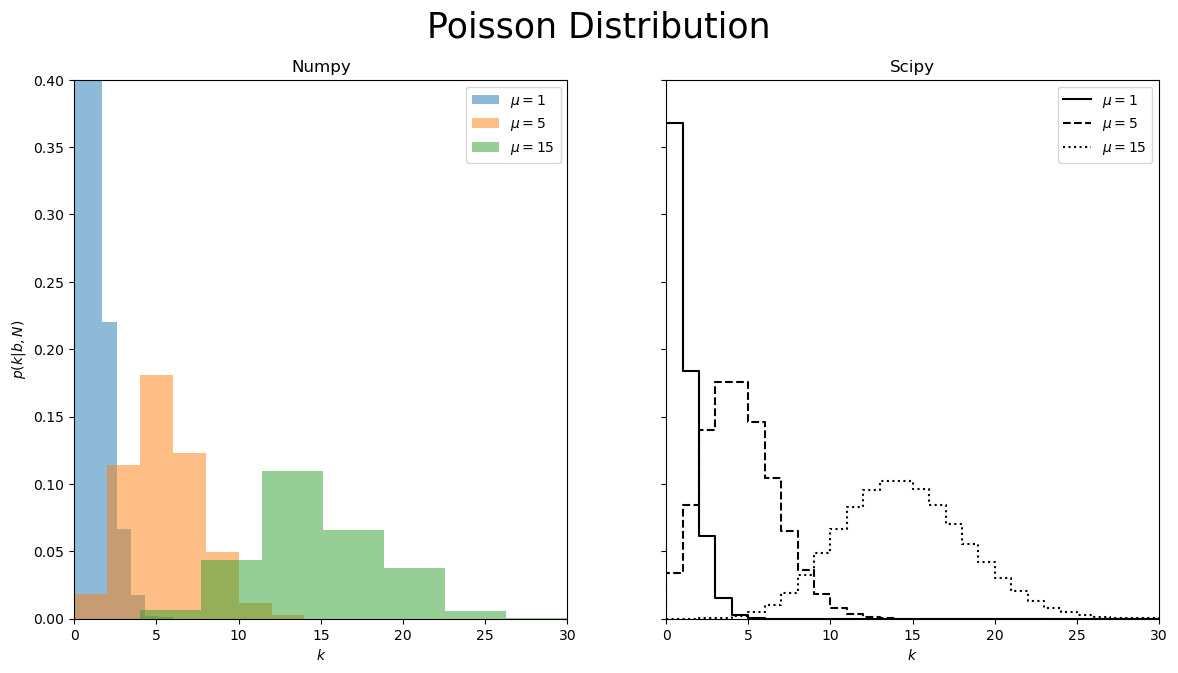

In [ ]:
np.random.seed(100)
fig, ax = plt.subplots(1,2, figsize=(14,7), sharex=True, sharey=True)
fig.suptitle("Poisson Distribution", fontsize=25)

for mu, ls in zip(mu_list, ls_list):
    np.random.seed(69)
    sample = np.random.poisson(mu, 1000)
    count, bins, ignored = ax[0].hist(sample, bins=7, alpha=0.5, 
                                   density=True, label=f'$\mu={mu}$')
    
    ax[0].set(title="Numpy", 
           xlabel=r"$k$", ylabel=r"$p(k|b, N)$",
           xlim=(0,35), ylim=(0,0.25))
    ax[0].legend()
    
    dist = stats.poisson(mu)
    ax[1].step(poisson_x, dist.pmf(poisson_x), ls=ls, c='black',
             label=f'$\mu={mu}$')
    
    ax[1].set(title="Scipy", 
           xlabel=r"$k$", 
           xlim=(0,30), ylim=(0,0.40))
    ax[1].legend()

## C. Exponential Distribution


$$ p(x|\lambda) = \lambda e^{-\lambda x}$$
$$ p(x|\beta) = \frac{1}{\beta} e^{-\frac{1}{\beta} x}$$

Wherein

- $p(x|\mu)$: Exponential probability distribution as a function of $x$, and constant $\lambda$
- $\mu$: mean
- $\lambda$: rate parameter
- $\beta$: scale parameter

**Observed from:**
- Probability of getting the next phone call in a call center
- Probability of the next earthquake happening from now


In [ ]:
beta_list = [1,5,10]
expon_x = np.arange(0,31)

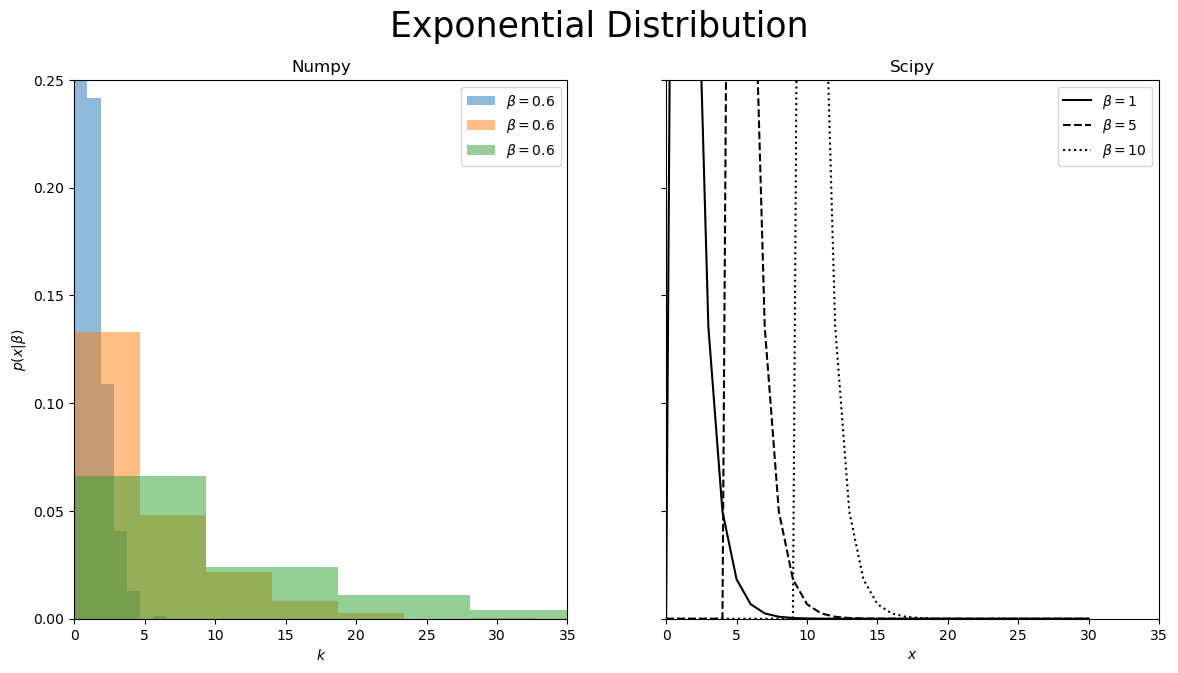

In [ ]:
np.random.seed(100)
fig, ax = plt.subplots(1,2, figsize=(14,7), sharex=True, sharey=True)
fig.suptitle("Exponential Distribution", fontsize=25)

for beta, ls in zip(beta_list, ls_list):
    np.random.seed(69)
    sample = np.random.exponential(beta, 1000)
    count, bins, ignored = ax[0].hist(sample, bins=7, alpha=0.5, 
                                      density=True, label=f'$\\beta={b}$',
                                     )
    
    ax[0].set(title="Numpy", 
           xlabel=r"$k$", ylabel=r"$p(x|\beta)$",
           xlim=(0,35), ylim=(0,0.25))
    ax[0].legend()
    
    dist = stats.expon(beta)
    ax[1].plot(expon_x, dist.pdf(expon_x), ls=ls, c='black', 
               label=f'$\\beta={beta}$',
              )
    
    ax[1].set(title="Scipy", 
           xlabel=r"$x$")
    ax[1].legend()

## D. CLT Demonstrations

### `CLT_Demonstrator`

In [ ]:
def CLT_Demonstrator(pop_size, pop_dist, sample_list, dist_title=None):
    """
    A crude function for visualizing CLT from a given distribution array an a list of sample numbers to consider.
    
    Parameters:
    
    pop_size: The size of the population. This should be the length of pop_dist,
    pop_dist: The 1D array containing the distribution.
    sample_list: The list of integers to be considered as sample sizes.
    dist_title: The name of the distribution visualized.
    """
    pop_size = 1000000

    fig, ax = plt.subplots(1,2,figsize=(14,7), sharey=True)
    fig.suptitle(dist_title, fontsize=25)

    ax[0].hist(pop_dist, density=True, bins=50, alpha=0.8, label=f"N={pop_size}")
    ax[0].set(title='Population Distribution', xlabel="x")
    ax[0].legend()

    for n in sample_list:

        np.random.seed(420)
        sample_means = []

        for i in range(10000):
            samp = np.random.choice(pop_dist, n)
            sample_means.append(np.mean(samp))

        ax[1].hist(sample_means, label=f"n={n}", 
                   bins=50, 
                   histtype='step', 
                   #alpha=0.8,
                   ls='-',
                   density=True);

    ax[1].set(title='Mean Sampling Distribution', xlabel=r"$\bar{x}$")
    ax[1].legend()

### Uniform Distribution

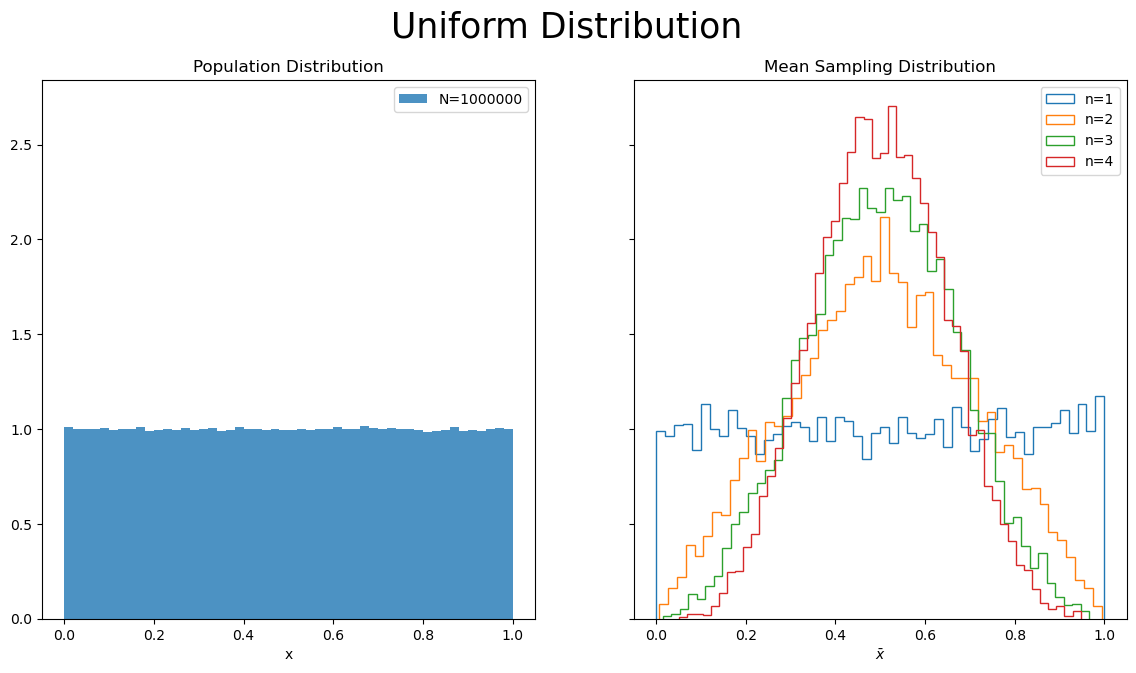

In [ ]:
CLT_Demonstrator(1000000, 
                 np.random.uniform(size=1000000), 
                 [1,2,3,4], 
                 dist_title='Uniform Distribution')

### Binomial Distribution

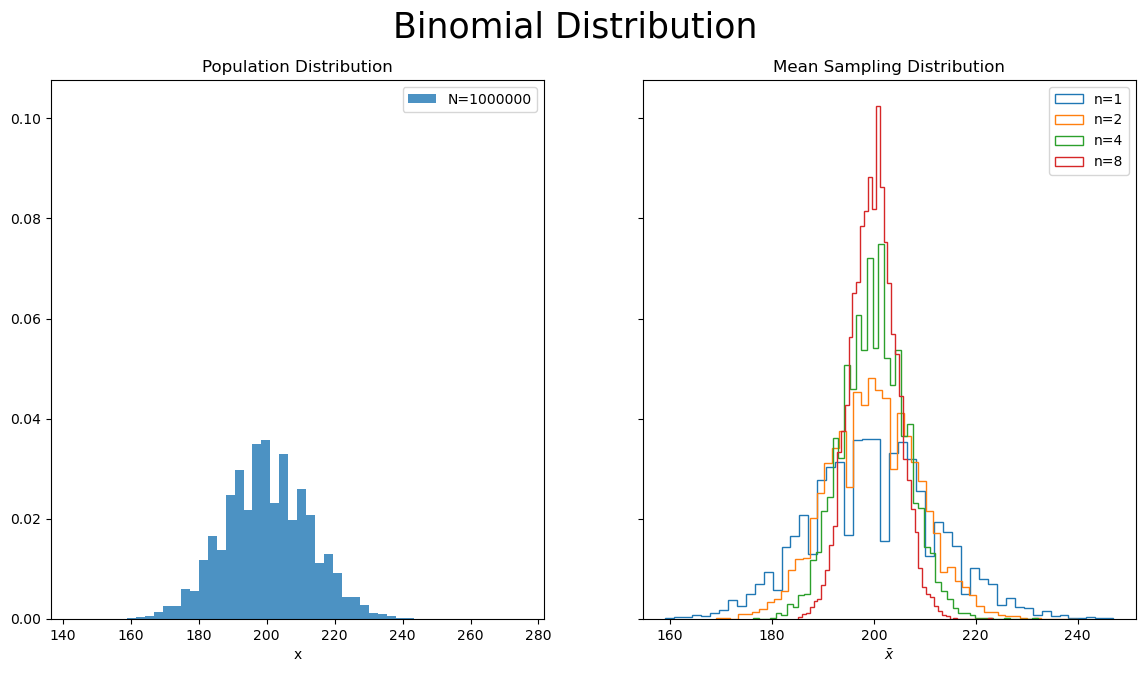

In [ ]:
CLT_Demonstrator(1000000, 
                 np.random.binomial(1000,0.2, size=1000000), 
                 [1,2,4,8], 
                 dist_title='Binomial Distribution')

### Poisson Distribution

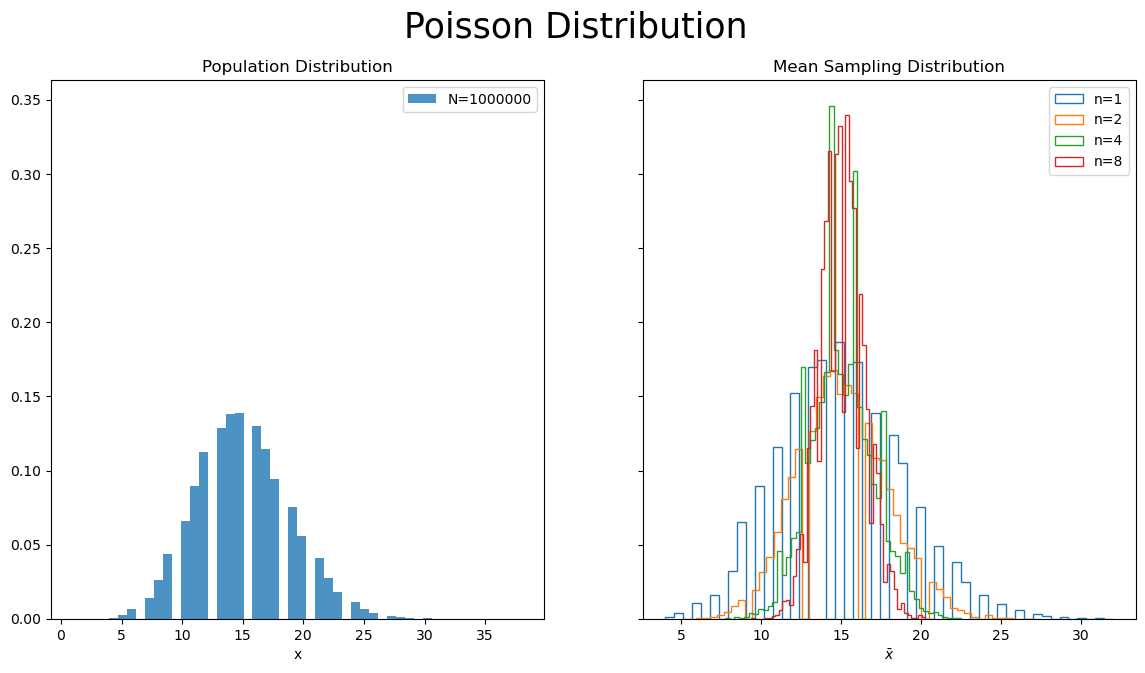

In [ ]:
np.random.poisson(mu, 1000)

CLT_Demonstrator(1000000, 
                 np.random.poisson(15, 1000000), 
                 [1,2,4,8], 
                 dist_title='Poisson Distribution')

### Exponential Distribution

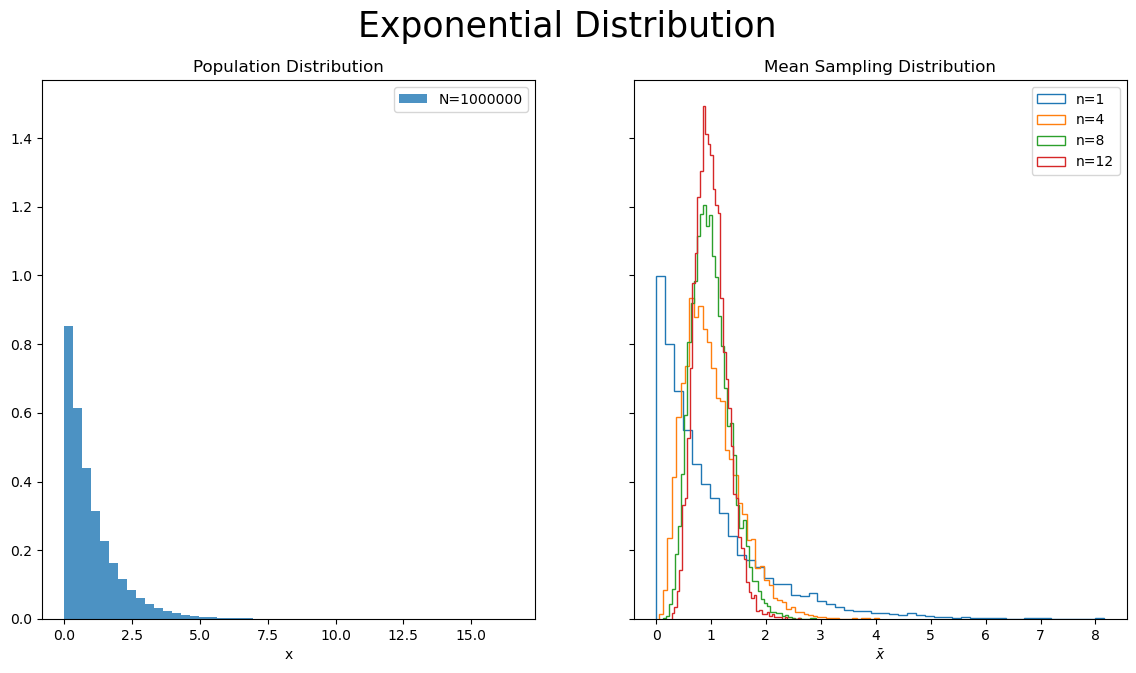

In [ ]:
CLT_Demonstrator(1000000, 
                 np.random.exponential(size=1000000), 
                 [1,4,8,12], 
                 dist_title='Exponential Distribution')

### End of tutorial.

---

# Sample Exercise

- Try to solve this exercise if you can

1.) In the given two code cells below, the aim is to get the first five rows of the titanic dataset and subset the rows that are not "NaN" in the <b> deck </b> column. <br>
However, what was obtained in the second code cell are the rows that are NaN instead. Can you modify the code so that it will obtain the rows that are <b> not </b> NaN for the <b> deck </b> column?

In [ ]:
titanic_f4_df = titanic_df.head()  # getting the first 5 rows of the titanic dataset
titanic_f4_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# modify this code to answer exercise #1

titanic_f4_df_notnan = titanic_f4_df[titanic_f4_df["deck"].isna()]
titanic_f4_df_notnan

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
